/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Epoch 6 completed.
Epoch 7 completed.
Epoch 8 completed.
Epoch 9 completed.
Epoch 10 completed.
Epoch 11 completed.
Epoch 12 completed.
Epoch 13 completed.
Epoch 14 completed.
Epoch 15 completed.
Epoch 16 completed.
Epoch 17 completed.
Epoch 18 completed.
Epoch 19 completed.
Epoch 20 completed.
Epoch 21 completed.
Epoch 22 completed.
Epoch 23 completed.
Epoch 24 completed.
Epoch 25 completed.
Epoch 26 completed.
Epoch 27 completed.
Epoch 28 completed.
Epoch 29 completed.
Epoch 30 completed.
Epoch 31 completed.
Epoch 32 completed.
Epoch 33 completed.
Epoch 34 completed.
Epoch 35 completed.
Epoch 36 completed.
Epoch 37 completed.
Epoch 38 completed.
Epoch 39 completed.
Epoch 40 completed.
Epoch 41 completed.
Epoch 42 completed.
Epoch 43 completed.
Epoch 44 completed.
Epoch 45 completed.
Epoch 46 completed.
Epoch 47 completed.
Epoch 48 completed.
Epoch 49 completed.
Epoch 50 completed.
Epoch 51 

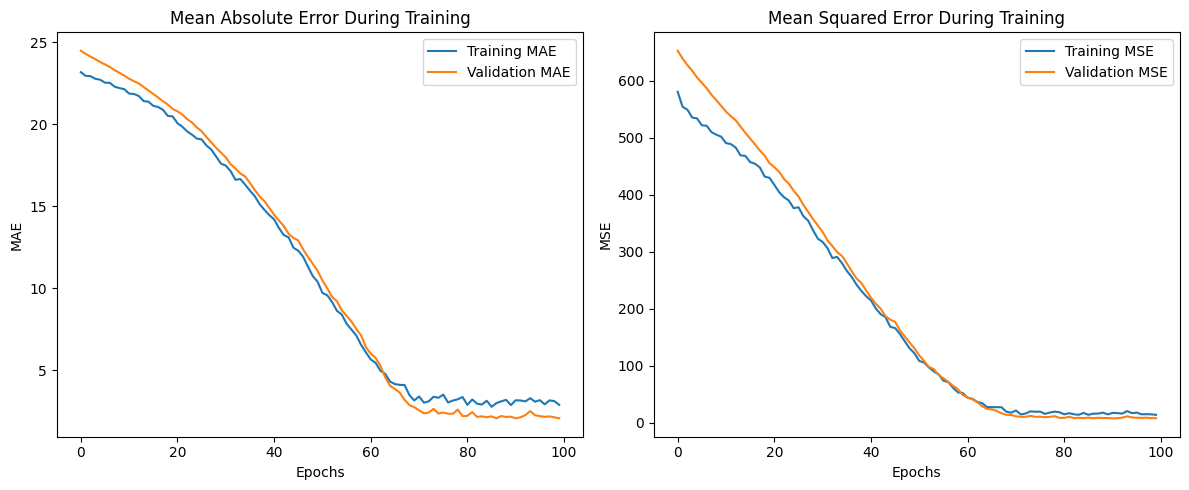

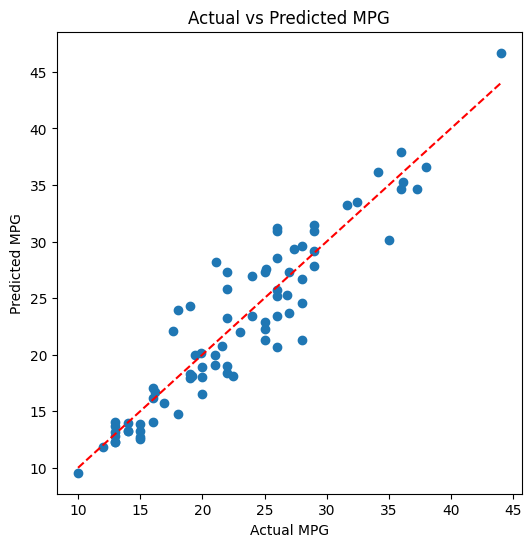

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

✅ Predicted MPG for the new car: 29.76


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# Drop missing values
dataset = raw_dataset.dropna()

# One-hot encode 'Origin'
features = dataset.drop(['MPG'], axis=1)
features = pd.get_dummies(features, columns=['Origin'], prefix='Origin')

labels = dataset['MPG']

# Standard scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split dataset
train_features, test_features, train_labels, test_labels = train_test_split(
    scaled_features, labels, test_size=0.2, random_state=42)

# Define model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_features.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile model
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['mae', 'mse']
)

# Custom callback to print epoch number
class PrintEpochCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} completed.")

# Callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model
history = model.fit(
    train_features, train_labels,
    epochs=100, validation_split=0.2, verbose=0,
    callbacks=[PrintEpochCallback(), early_stop, lr_scheduler]
)

# Evaluate
test_loss, test_mae, test_mse = model.evaluate(test_features, test_labels, verbose=0)
predicted_mpg = model.predict(test_features)

# Metrics
mae = mean_absolute_error(test_labels, predicted_mpg)
mse = mean_squared_error(test_labels, predicted_mpg)
r2 = r2_score(test_labels, predicted_mpg)

print(f"Test MAE (from model.evaluate): {test_mae:.3f}")
print(f"Test MSE (from model.evaluate): {test_mse:.3f}")
print(f"Mean Absolute Error (sklearn): {mae:.3f}")
print(f"Mean Squared Error (sklearn): {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plot MAE and MSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error During Training')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error During Training')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

# Plot predictions
plt.figure(figsize=(6,6))
plt.scatter(test_labels, predicted_mpg)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--')
plt.show()

# ==== 🔽 ENTER NEW CAR FEATURES HERE 🔽 ====
# Format: [Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin]
new_car_input = [4, 140, 95, 2700, 15.5, 82, 2]

# Convert to DataFrame
new_car_df = pd.DataFrame([new_car_input], columns=column_names[1:])

# One-hot encode 'Origin'
new_car_df = pd.get_dummies(new_car_df, columns=['Origin'], prefix='Origin')

# Match training columns
for col in features.columns:
    if col not in new_car_df.columns:
        new_car_df[col] = 0
new_car_df = new_car_df[features.columns]  # Maintain column order

# Scale new input
scaled_new_car = scaler.transform(new_car_df)

# Predict MPG
new_car_prediction = model.predict(scaled_new_car)
print(f"\n✅ Predicted MPG for the new car: {new_car_prediction[0][0]:.2f}")
